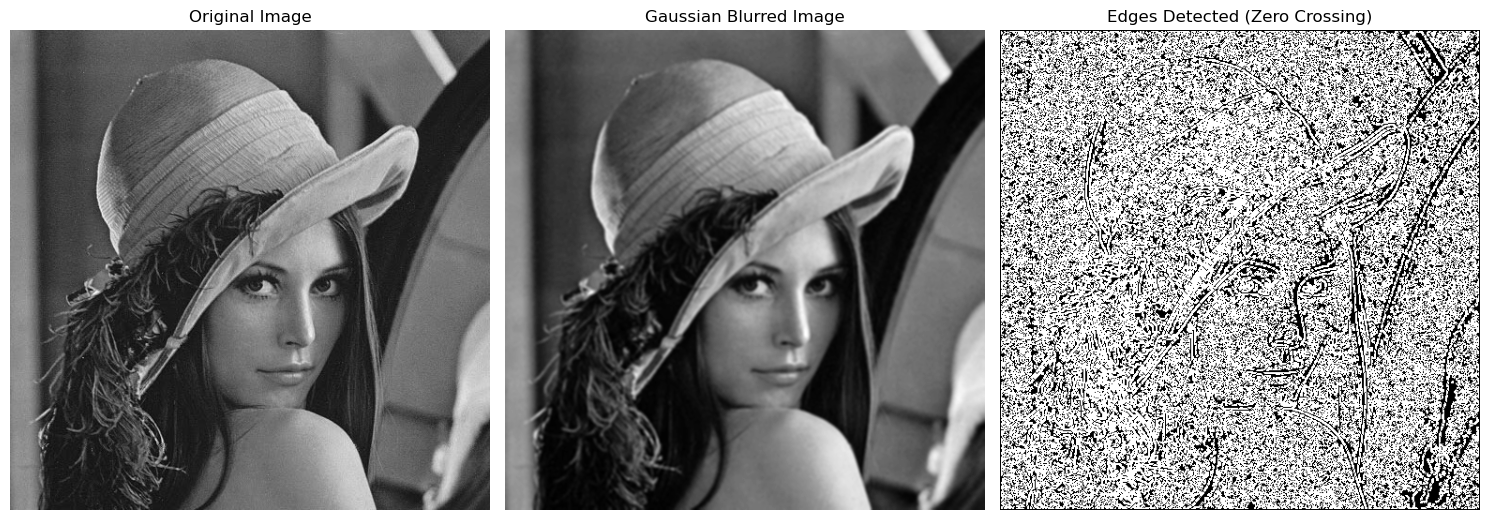

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Path to the image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image could not be loaded.")
else:
    # Apply Gaussian Blur to smooth the image
    blurred_image = cv2.GaussianBlur(image, (5, 5), sigmaX=1.4)

    # Apply Laplacian filter to compute second derivatives
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)

    # Detect zero crossings
    zero_crossing = np.zeros_like(laplacian, dtype=np.uint8)
    rows, cols = laplacian.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Check for sign changes in neighbors
            if (laplacian[i, j] > 0 and (laplacian[i-1:i+2, j-1:j+2] < 0).any()):
                zero_crossing[i, j] = 255
            elif (laplacian[i, j] < 0 and (laplacian[i-1:i+2, j-1:j+2] > 0).any()):
                zero_crossing[i, j] = 255

    # Plot the results
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title("Gaussian Blurred Image")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(zero_crossing, cmap='gray')
    plt.title("Edges Detected (Zero Crossing)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
